**Nama :** Debi Welani Christin Saragih

**ID :** MC009D5X0246

**Kelas :** MC35

# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
#import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
#Memmuat dataset hasil clustering (berlabel)
df = pd.read_csv('https://raw.githubusercontent.com/debswell/fraud-detection/refs/heads/main/df_Creditrisk_clustering.csv')
df.head()

,annual_income,dti,installment,int_rate,loan_amount,grade,home_ownership,loan_status,verification_status,Cluster
0,30000.0,0.0100,59.83,0.1527,2500.0,C,RENT,Charged Off,Source Verified,0.0
1,48000.0,0.0535,109.43,0.1864,3000.0,E,RENT,Fully Paid,Source Verified,0.0
2,50000.0,0.2088,421.65,0.1596,12000.0,C,RENT,Charged Off,Not Verified,0.0
3,42000.0,0.0540,97.06,0.1065,4500.0,B,MORTGAGE,Fully Paid,Source Verified,1.0
4,83000.0,0.0231,106.53,0.0603,3500.0,A,MORTGAGE,Fully Paid,Verified,1.0


In [3]:
#Melihat kembali info dari dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38576 entries, 0 to 38575
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   annual_income        38574 non-null  float64
 1   dti                  38574 non-null  float64
 2   installment          38574 non-null  float64
 3   int_rate             38574 non-null  float64
 4   loan_amount          38574 non-null  float64
 5   grade                38574 non-null  object 
 6   home_ownership       38574 non-null  object 
 7   loan_status          38574 non-null  object 
 8   verification_status  38574 non-null  object 
 9   Cluster              38572 non-null  float64
dtypes: float64(6), object(4)
memory usage: 2.9+ MB


In [4]:
#sebelum dataset kita bagi, kita ubah terlebih dahulu data object menajdi numerik
encoder = LabelEncoder()
category_columns = df[['grade','home_ownership','loan_status','verification_status']]
for column in category_columns:
    df[column] = encoder.fit_transform(df[column])
df.head()

,annual_income,dti,installment,int_rate,loan_amount,grade,home_ownership,loan_status,verification_status,Cluster
0,30000.0,0.0100,59.83,0.1527,2500.0,2,4,0,1,0.0
1,48000.0,0.0535,109.43,0.1864,3000.0,4,4,2,1,0.0
2,50000.0,0.2088,421.65,0.1596,12000.0,2,4,0,0,0.0
3,42000.0,0.0540,97.06,0.1065,4500.0,1,0,2,1,1.0
4,83000.0,0.0231,106.53,0.0603,3500.0,0,0,2,2,1.0


In [5]:
#cek nilai kosong
df.isnull().sum()

,0
annual_income,2
dti,2
installment,2
int_rate,2
loan_amount,2
grade,0
home_ownership,0
loan_status,0
verification_status,0
Cluster,4


In [6]:
#Menghapus nilai kosong
df.dropna(inplace=True)

# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [7]:
#Data numerik kita normalisasikan terlebih dahulu
scaler = MinMaxScaler()

numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

df.head()

,annual_income,dti,installment,int_rate,loan_amount,grade,home_ownership,loan_status,verification_status,Cluster
0,0.004336,0.033344,0.034230,0.513824,0.057971,0.333333,1.0,0.0,0.5,0.0
1,0.007338,0.178393,0.072695,0.689619,0.072464,0.666667,1.0,1.0,0.5,0.0
2,0.007672,0.696232,0.314820,0.549817,0.333333,0.333333,1.0,0.0,0.0,0.0
3,0.006338,0.180060,0.063102,0.272822,0.115942,0.166667,0.0,1.0,0.5,1.0
4,0.013175,0.077026,0.070446,0.031821,0.086957,0.000000,0.0,1.0,1.0,1.0


In [8]:
#Bagi Data menjadi data latih dan data uji
X = df.drop('Cluster', axis=1)
y = df['Cluster']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
#Melihat bentuk data yang sudah di split
print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training set shape: X_train=(27000, 9), y_train=(27000,)
Test set shape: X_test=(11572, 9), y_test=(11572,)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [21]:
#Pembuatan model algoritma
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3,metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [22]:

#Algoritma lain sebgaai pembanding
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

Pada tahap klasifikasi ini, saya menggunakan model algoritma klasifikasi KNN. Selain karena sederhana, data yang saya punya juga tidak terlalu besar, sehingga menurut saya merode yang lebih sederhana juga bisa dan bagus dalam proses pembuatan model ini. Saya menggunakan Euclidean Distance untuk menghitung jarak garis lurus antara dua titik dalam ruang fitur dan memilih jumlah tetangga terdekat yaitu 3. dan hasil evaluasi nya nanti akan dibandingkan juga dengan algoritma lain yaiut Decision Tree

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [23]:
#Melakukan prediksi terhadap data uji
y_pred = knn.predict(X_test)

==== KNN Classifier ====
Confusion Matrix:
[[6439    0]
 [   4 5129]]
True Positive (TP): 5129
False Positive (FP): 0
False Negative (FN): 4
True Negative (TN): 6439
Accuracy: 0.9997
Precision: 1.0000
Recall: 0.9992
F1-Score: 0.9996

----------------------------------------



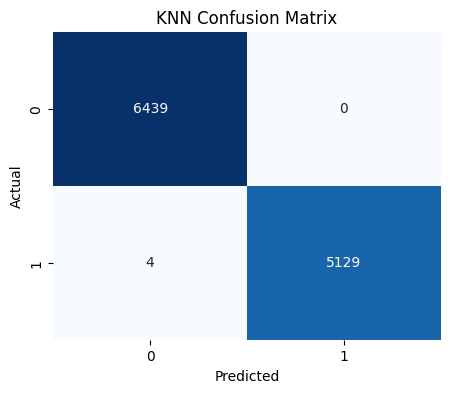

In [18]:
#Menghitung metrik evaluasi
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


cm_knn = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm_knn.ravel()
print("==== KNN Classifier ====")
print("Confusion Matrix:")
print(cm_knn)
print(f"True Positive (TP): {tp}")
print(f"False Positive (FP): {fp}")
print(f"False Negative (FN): {fn}")
print(f"True Negative (TN): {tn}")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
print("\n" + "-"*40 + "\n")

plt.figure(figsize=(5, 4))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

==== Decision Tree Classifier ====
Confusion Matrix:
[[6437    2]
 [   1 5132]]
True Positive (TP): 5132
False Positive (FP): 2
False Negative (FN): 1
True Negative (TN): 6437
Accuracy: 0.9997
Precision: 0.9996
Recall: 0.9998
F1-Score: 0.9997

----------------------------------------



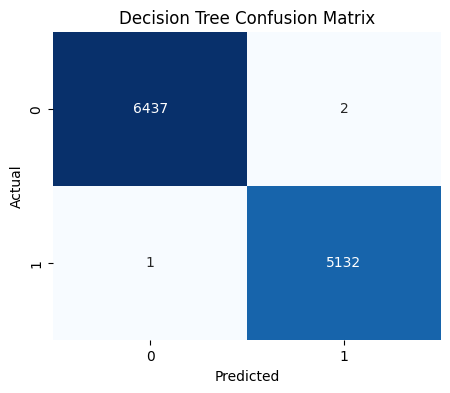

In [24]:
#Evaluasi Decision tree
y_pred_dt = dt.predict(X_test)
cm_dt = confusion_matrix(y_test, y_pred_dt)
tn, fp, fn, tp = cm_dt.ravel()
print("==== Decision Tree Classifier ====")
print("Confusion Matrix:")
print(cm_dt)
print(f"True Positive (TP): {tp}")
print(f"False Positive (FP): {fp}")
print(f"False Negative (FN): {fn}")
print(f"True Negative (TN): {tn}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_dt):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_dt):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_dt):.4f}")
print("\n" + "-"*40 + "\n")

plt.figure(figsize=(5, 4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Pada hasil evaluasi kedua model,



1.   KNN

Hasil evalusi nya adalah
Confusion Matrix yang memiliki

True Positive (TP): 5129

False Positive (FP): 0

False Negative (FN): 4

True Negative (TN): 6439

KNN hanya menunjukkan hasil prediksi 4 kesalahan negatif

Accuracy: 0.9997, Precision: 1.0000, Recall: 0.9992, F1-Score: 0.9996 (hampir sempurna)
2.   Decision Tree

Hasil evalusinya menunjukkan

Confusion Matrix:

True Positive (TP): 5132

False Positive (FP): 2

False Negative (FN): 1

True Negative (TN): 6437

Salah memperdiksi nilai positif hanya 2 dan 1 untuk negatif

Accuracy: 0.9997, Precision: 0.9996, Recall: 0.9998, F1-Score: 0.9997

Dari hasil evaluasi diatas model memiliki akurasi dan F1 score yang sangat tinggi dan hampir sempurna.

**Kesimpulannya, KNN dan DT memprediksi data dengan sangat baik dan hampir sempurna, dengan akurasi dan F1 score nya sama hanya berbeda pada Precision dan Recall**





## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [25]:
#Karena model sudah memberikan hasil yan sempurna, maka tidak perlu dilakukan Tuning

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [26]:
#Tidak dilakukan

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

**Kesimpulan**



*   Model KNN ataupun DT bekerja sudah sangat optimal, tidak menunjukkan adanya kelemahan
*   Dari hasil evaluasi tidak ada underfitting atau overvitting yang terdeteksi
*   Mungkin model dapat dilakukan pada dataset baru untuk menguji lebih lanjut

